In [ ]:
#menghubungkan colab dengan google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
path = '/content/gdrive/MyDrive/praktikum/praktikum7'

In [ ]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [ ]:
# 2. Upload dataset
df = pd.read_csv(path + '/data/apples_and_oranges.csv')

In [ ]:
#3. Tampilkan 5 data teratas
df.head()


,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  40 non-null     int64  
 1   Size    40 non-null     float64
 2   Class   40 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.1+ KB


In [ ]:
#cek missing value
df.isnull().sum()

,0
Weight,0
Size,0
Class,0


In [ ]:
# Lihat nama kolom dan contoh data
print("Nama kolom di dataset:")
print(df.columns.tolist())

Nama kolom di dataset:
['Weight', 'Size', 'Class']


In [ ]:
#Pisahkan fitur (X) dan label (y)
X = df[['Weight', 'Size']]
y = df['Class']


In [ ]:
# 6. Encode label menjadi angka (apple/orange -> 0/1)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [ ]:
# 7. Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# 8. Bagi data train dan test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

print("Jumlah data train:", len(X_train))
print("Jumlah data test:", len(X_test))

Jumlah data train: 32
Jumlah data test: 8


In [ ]:
# 9. Buat model SVM
model = SVC(kernel='linear', C=1.0, random_state=42)

In [ ]:
# 10. Latih model
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
# 11. Prediksi data uji
y_pred = model.predict(X_test)

In [ ]:
# 12. Evaluasi model
print("\nAkurasi Model:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Akurasi Model: 1.0

Laporan Klasifikasi:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00         3
      orange       1.00      1.00      1.00         5

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



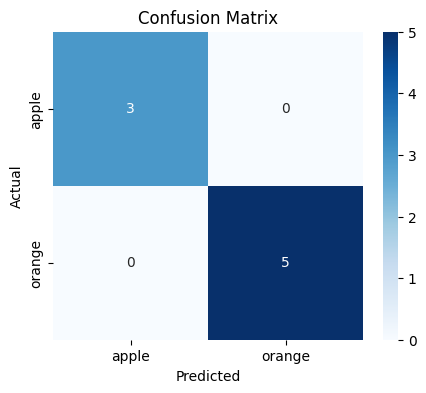

In [ ]:
# 13. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

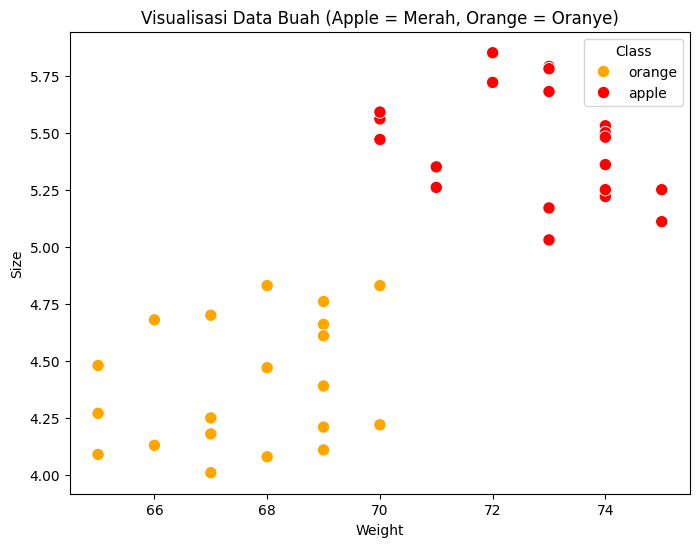

In [ ]:
# 14. Visualisasi Data (Sebelum Training)
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='Weight',
    y='Size',
    hue='Class',
    s=80,
    palette={'apple': 'red', 'orange': 'orange'}  # warna manual
)
plt.title('Visualisasi Data Buah (Apple = Merah, Orange = Oranye)')
plt.xlabel('Weight')
plt.ylabel('Size')
plt.legend(title='Class')
plt.show()


In [ ]:
# 15. Visualisasi Garis Pemisah SVM
w = model.coef_[0]
b = model.intercept_[0]


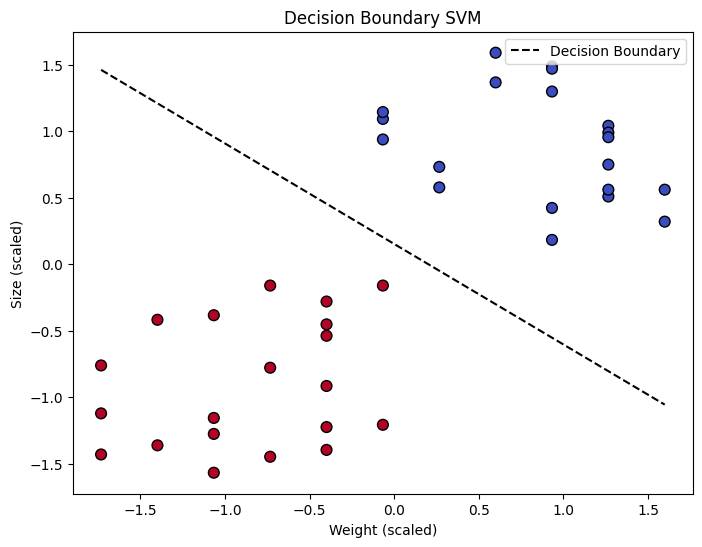

In [ ]:
# Buat garis keputusan di ruang 2D
x_points = np.linspace(X_scaled[:,0].min(), X_scaled[:,0].max())
y_points = -(w[0]/w[1])*x_points - b/w[1]

plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=y_encoded, cmap='coolwarm', s=60, edgecolors='k')
plt.plot(x_points, y_points, color='black', linestyle='--', label='Decision Boundary')
plt.xlabel('Weight (scaled)')
plt.ylabel('Size (scaled)')
plt.title('Decision Boundary SVM')
plt.legend()
plt.show()